<a href="https://colab.research.google.com/github/OmarK920/Data-Science-Projects/blob/main/BigData_Tools_ApacheSpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
hotels_df = pd.read_csv("egphotelbookings.csv")

In [ ]:
hotels_df.shape

(119390, 30)

In [ ]:
hotels_df.head(10)

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,Renaissance Hotel,0,342,2018,July,27,1,0,0,...,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,1,Renaissance Hotel,0,737,2018,July,27,1,0,0,...,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,2,Renaissance Hotel,0,7,2018,July,27,1,0,1,...,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,3,Renaissance Hotel,0,13,2018,July,27,1,0,1,...,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,4,Renaissance Hotel,0,14,2018,July,27,1,0,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1
5,5,Renaissance Hotel,0,14,2018,July,27,1,0,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1
6,6,Renaissance Hotel,0,0,2018,July,27,1,0,2,...,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0
7,7,Renaissance Hotel,0,9,2018,July,27,1,0,2,...,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1
8,8,Renaissance Hotel,1,85,2018,July,27,1,0,3,...,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1
9,9,Renaissance Hotel,1,75,2018,July,27,1,0,3,...,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0


In [ ]:
hotels_df.columns

Index(['Unnamed: 0', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

## a) Data Pre-Processing

In [ ]:
#Drop unnecessary column 'Unnamed: 0'
hotels_df.drop('Unnamed: 0', axis=1, inplace=True)


**Handling Missing Values**

In [ ]:
print(hotels_df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_

In [ ]:
#country is a categorical column, so we decided to fill missing values with the most frequent country
most_frequent_country = hotels_df['country'].mode()[0]
hotels_df['country'].fillna(most_frequent_country, inplace=True)

In [ ]:
#missing values in these columns indicate absence of an agent or company, we have decided fill them with 0
hotels_df['agent'].fillna(0, inplace=True)
hotels_df['company'].fillna(0, inplace=True)

In [ ]:
#Checking for duplicate rows
duplicates = hotels_df.duplicated()
print("Duplicate rows:", duplicates.sum())

Duplicate rows: 32278


In [ ]:
#Remove duplicated rows
hotels_df.drop_duplicates(inplace=True)


**Data Transformation**

In [ ]:
# Merge 'arrival_date_month', 'arrival_date_year', and 'arrival_date_day_of_month' into 'arrival_date'
date_columns = ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']
hotels_df['arrival_date'] = pd.to_datetime(hotels_df[date_columns].astype(str).agg('-'.join, axis=1), errors='coerce')

# Drop the individual date columns
hotels_df.drop(date_columns, axis=1, inplace=True)

In [ ]:
hotels_df.shape

(87112, 27)

In [ ]:
# Remove rows with NaT values in 'arrival_date' column
hotels_df.dropna(subset=['arrival_date'], inplace=True)


In [ ]:
hotels_df.shape

(87046, 27)

In [ ]:
hotels_df.head(5)

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date
0,Renaissance Hotel,0,342,27,0,0,2,0.0,0,BB,...,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,2018-07-01
1,Renaissance Hotel,0,737,27,0,0,2,0.0,0,BB,...,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,2018-07-01
2,Renaissance Hotel,0,7,27,0,1,1,0.0,0,BB,...,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,2018-07-01
3,Renaissance Hotel,0,13,27,0,1,1,0.0,0,BB,...,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,2018-07-01
4,Renaissance Hotel,0,14,27,0,2,2,0.0,0,BB,...,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,2018-07-01


In [ ]:
#Convert 'arrival_date_week_number' to categorical

#Defining bin boundaries
bins = [0, 15, 30, 53]

# Define the labels for each bin
labels = ['Week 1-15', 'Week 16-30', 'Week 31-53']

hotels_df['arrival_week_category'] = pd.cut(hotels_df['arrival_date_week_number'], bins=bins, labels=labels)

# Drop the arrival_date_week_number
hotels_df.drop('arrival_date_week_number', axis=1, inplace=True)

In [ ]:
hotels_df.head(5)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,arrival_week_category
0,Renaissance Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,2018-07-01,Week 16-30
1,Renaissance Hotel,0,737,0,0,2,0.0,0,BB,PRT,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,2018-07-01,Week 16-30
2,Renaissance Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,2018-07-01,Week 16-30
3,Renaissance Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,2018-07-01,Week 16-30
4,Renaissance Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,2018-07-01,Week 16-30


**Data Engineering**

In [ ]:
#1-Calculate the total number of guests (adults + children + babies) for each booking
hotels_df['total_guests'] = hotels_df['adults'] + hotels_df['children'] + hotels_df['babies']

In [ ]:
#2-Calculate the total number of nights stayed for each booking
hotels_df['total_nights'] = hotels_df['stays_in_weekend_nights'] + hotels_df['stays_in_week_nights']

In [ ]:
#3-Calculate the average lead time for each hotel
average_lead_time_by_hotel = hotels_df.groupby('hotel')['lead_time'].mean()


In [ ]:
#4-Calculate the average number of special requests per booking
hotels_df['avg_special_requests'] = hotels_df['total_of_special_requests'] / (hotels_df['stays_in_weekend_nights'] + hotels_df['stays_in_week_nights'])


In [ ]:
#5-Calculate the booking rate (percentage of canceled bookings) for each hotel
booking_rate_by_hotel = hotels_df.groupby('hotel')['is_canceled'].mean() * 100


In [ ]:
hotels_df.head(5)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,arrival_week_category,total_guests,total_nights,avg_special_requests
0,Renaissance Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,0,Transient,0.0,0,0,2018-07-01,Week 16-30,2.0,0,NaN
1,Renaissance Hotel,0,737,0,0,2,0.0,0,BB,PRT,...,0,Transient,0.0,0,0,2018-07-01,Week 16-30,2.0,0,NaN
2,Renaissance Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,0,Transient,75.0,0,0,2018-07-01,Week 16-30,1.0,1,0.0
3,Renaissance Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,0,Transient,75.0,0,0,2018-07-01,Week 16-30,1.0,1,0.0
4,Renaissance Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,0,Transient,98.0,0,1,2018-07-01,Week 16-30,2.0,2,0.5


In [ ]:
#Drop rows with missing values in other columns
hotels_df.dropna(inplace=True)

In [ ]:
hotels_df.shape

(86651, 30)

# b) Data Visualizations

In [ ]:
#Visualization 1

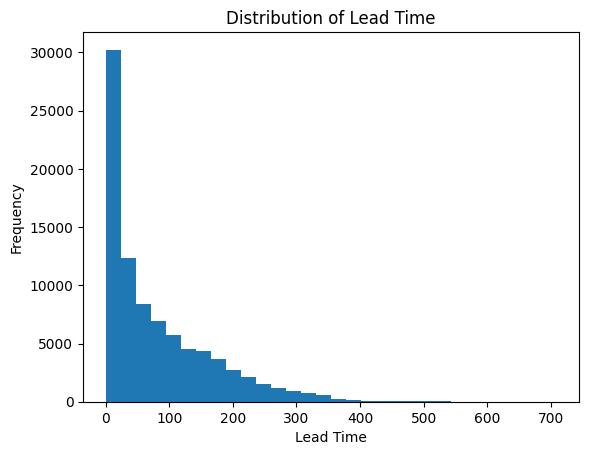

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of lead time
plt.hist(hotels_df['lead_time'], bins=30)
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.title('Distribution of Lead Time')
plt.show()


In [ ]:
#Insight 1: most bookings are made closer to the arrival date.
#This suggests that a significant portion of guests
#prefer to book their stays relatively close to their planned travel dates.

In [ ]:
#-------------------------------------

In [ ]:
#Visualization 2

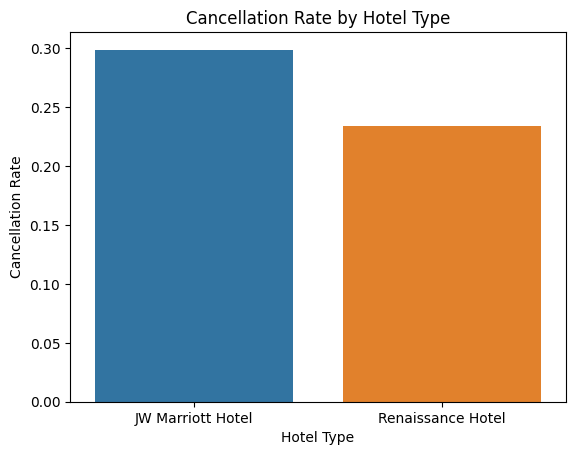

In [ ]:
import seaborn as sns

# Calculate cancellation rates by hotel type
cancellation_rates = hotels_df.groupby('hotel')['is_canceled'].mean()

# Plot cancellation rates
sns.barplot(x=cancellation_rates.index, y=cancellation_rates.values)
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Hotel Type')
plt.show()


In [ ]:
#Insight 2: Graph 2 showed that the cancellation Rate in the JW Marriott Hotel
#is higher than the cancellation Rate in the Renaissance Hotel.

In [ ]:
#-----------------------------------

In [ ]:
#Visualization 3

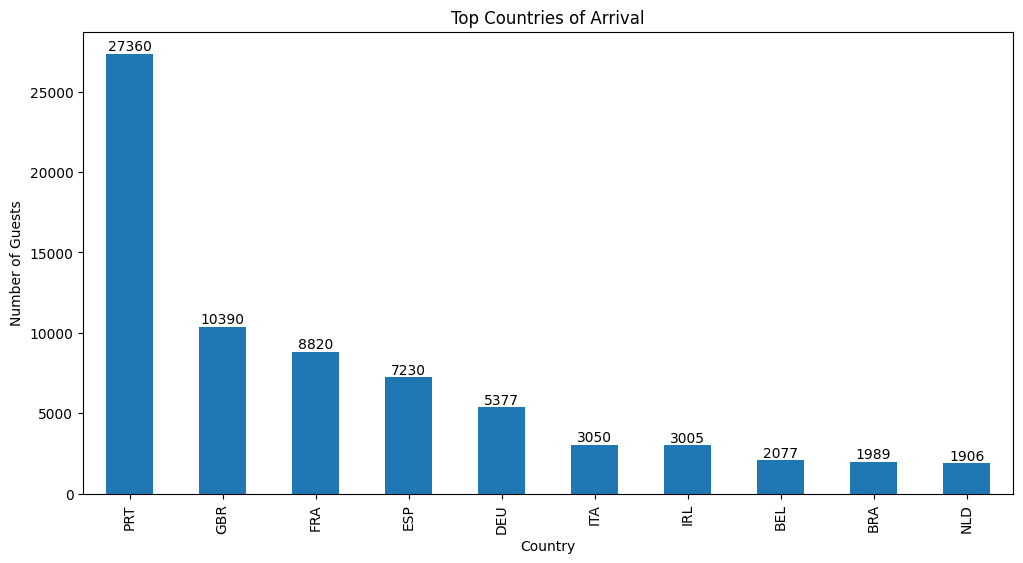

In [ ]:
import matplotlib.pyplot as plt

# Calculate the count of guests from each country
country_counts = hotels_df['country'].value_counts().head(10)
# Plot the bar chart
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Guests')
plt.title('Top Countries of Arrival')

# Add data labels to the bars
for i, count in enumerate(country_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()


In [ ]:
#Insight 3: Graph 3 showing the top 10 countries where most guests are arriving from
#having portugal in the lead with 27360 guests and Netherlands at the 10th position with 1906 guests

<ipython-input-41-29cd52ad2ad8>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = hotels_df.corr()


<Axes: >

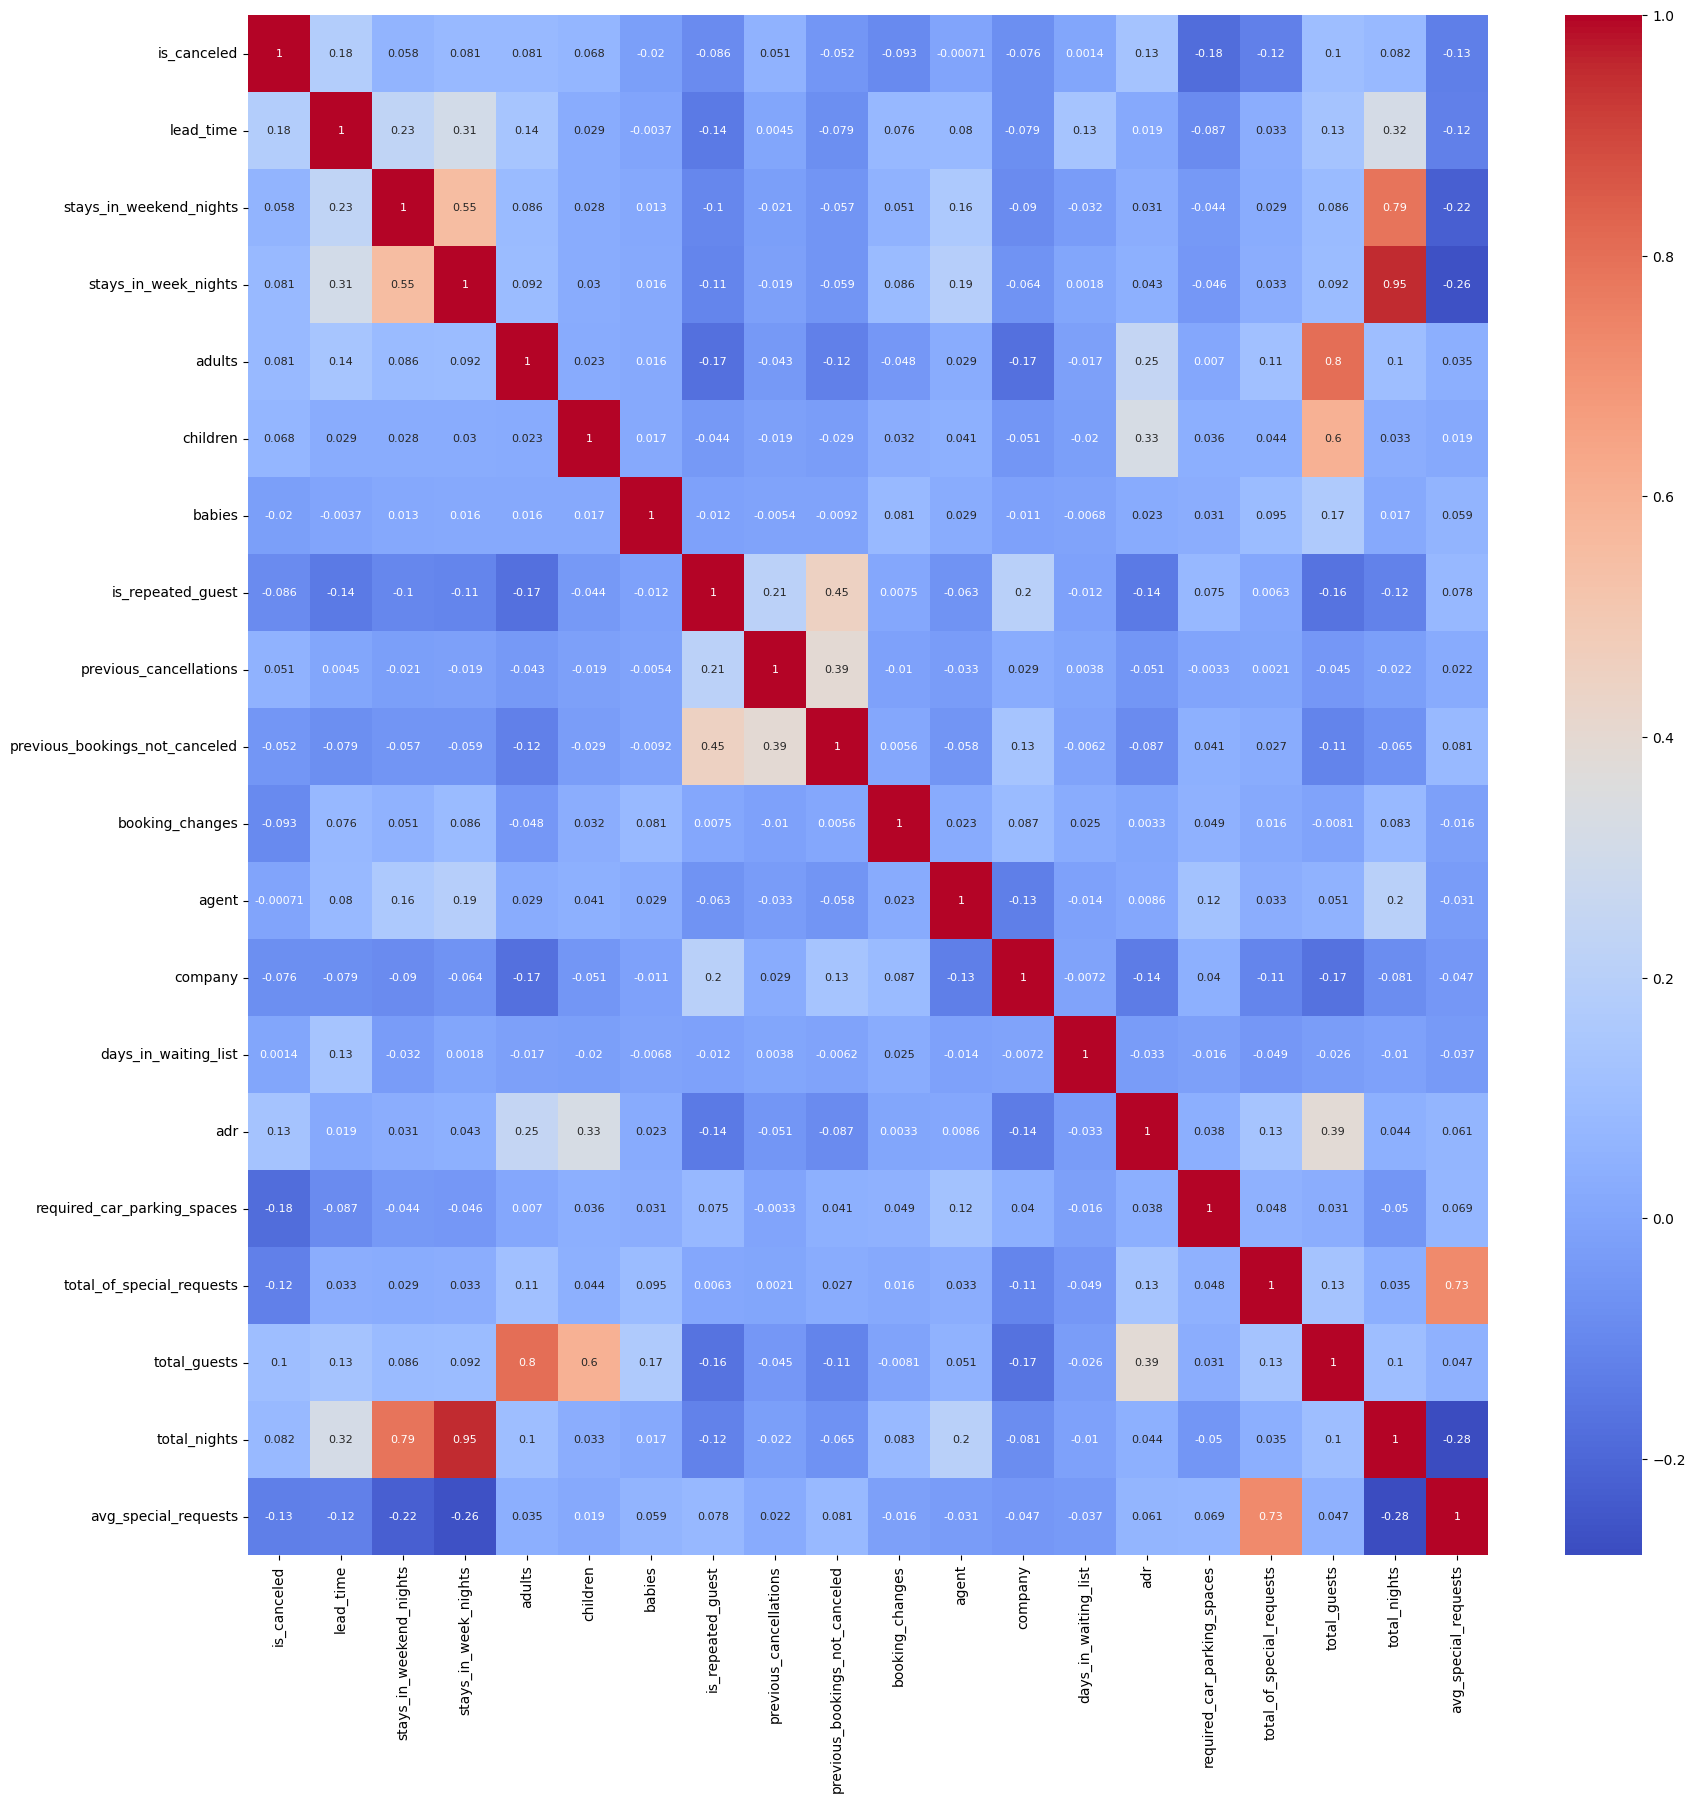

In [ ]:
#correlation matrix visualizations just for showing dependencies
import seaborn as sns

#Compute correlation matrix
corr_matrix = hotels_df.corr()

#Create a heatmap plot
plt.figure(figsize=(20, 20))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm' , annot_kws={'fontsize': 8})

# c) Spark SQL

In [ ]:
# Installing required packages
!pip install pyspark
!pip install findspark
!pip install pyarrow==1.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=39838a5ce6c6e5ff86ef11d897bc4eea60c327bea4140521833bacbf3bfc6958
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subproc

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [ ]:
# Creating a spark context class
sc = SparkContext()

# Creating a spark session
spark = SparkSession \
    .builder \
    .appName("Python Spark DataFrames basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [ ]:
spark

In [ ]:
sdf = spark.createDataFrame(hotels_df)

In [ ]:
sdf.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: long (nullable = true)
 |-- lead_time: long (nullable = true)
 |-- stays_in_weekend_nights: long (nullable = true)
 |-- stays_in_week_nights: long (nullable = true)
 |-- adults: long (nullable = true)
 |-- children: double (nullable = true)
 |-- babies: long (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: long (nullable = true)
 |-- previous_cancellations: long (nullable = true)
 |-- previous_bookings_not_canceled: long (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullable = true)
 |-- booking_changes: long (nullable = true)
 |-- deposit_type: string (nullable = true)
 |-- agent: double (nullable = true)
 |-- company: double (nullable = true)
 |-- days_in_waiting_list: long (nullable = true)
 |-- customer_type: string (nullable = true)
 |-- adr: double 

In [ ]:
sdf.createTempView("hotels")

In [ ]:
#Promotions for Renaissaince Hotel:


In [ ]:
#1-Couples discount, This query intends to find bookings that are ideal for couples, provide them a special booking discount.
spark.sql("""
    SELECT COUNT(*) AS total_bookings, AVG(adr) AS average_price
    FROM hotels
    WHERE hotel = 'Renaissance Hotel'
      AND is_canceled = 0
      AND adults = 2
      AND children = 0
""").show()

+--------------+-----------------+
|total_bookings|    average_price|
+--------------+-----------------+
|         17801|94.10433009381568|
+--------------+-----------------+



In [ ]:
#2-Business Discount, using the lead_time column to identify bookings made within a short timeframe (less than 5 days),
#Offer a discounted rate booking
spark.sql("""
    SELECT COUNT(*) AS total_bookings, AVG(adr) AS average_price
    FROM hotels
    WHERE hotel = 'Renaissance Hotel'
    AND lead_time < 5
""").show()

+--------------+-----------------+
|total_bookings|    average_price|
+--------------+-----------------+
|          6703|78.01509771743993|
+--------------+-----------------+



In [ ]:
#3-Dinning Discout, use the meal column to identify bookings where guests have chosen a meal option (not null).
#Offering a promotion that includes a dinner at the hotel's restaurant for guests who book a minimum stay of 3 nights or more.

spark.sql("""
    SELECT COUNT(*) AS total_bookings, AVG(adr) AS average_price
    FROM hotels
    WHERE hotel = 'Renaissance Hotel'
    AND meal IS NOT NULL
    AND (stays_in_weekend_nights + stays_in_week_nights) >= 3

""").show()

+--------------+------------------+
|total_bookings|     average_price|
+--------------+------------------+
|         21701|108.69774756923671|
+--------------+------------------+



**Promotions for JW Mariott Hotel**

In [ ]:
#Family Discount, Identify bookings made during family vacation seasons (may, june, july and August)
#using the arrival_date column and children , Offering a special family offer.)

spark.sql("""
    SELECT children, arrival_date
    FROM hotels
    WHERE hotel = 'JW Marriott Hotel'
      AND arrival_date BETWEEN '2019-05-15' AND '2019-09-15'
      AND children > 0
""").show()

+--------+-------------------+
|children|       arrival_date|
+--------+-------------------+
|     2.0|2019-05-15 00:00:00|
|     1.0|2019-05-15 00:00:00|
|     2.0|2019-05-15 00:00:00|
|     3.0|2019-05-15 00:00:00|
|     2.0|2019-05-15 00:00:00|
|     1.0|2019-05-15 00:00:00|
|     2.0|2019-05-16 00:00:00|
|     2.0|2019-05-16 00:00:00|
|     2.0|2019-05-16 00:00:00|
|     2.0|2019-05-16 00:00:00|
|     2.0|2019-05-17 00:00:00|
|     2.0|2019-05-18 00:00:00|
|     1.0|2019-05-18 00:00:00|
|     2.0|2019-05-19 00:00:00|
|     2.0|2019-05-20 00:00:00|
|     1.0|2019-05-21 00:00:00|
|     2.0|2019-05-21 00:00:00|
|     1.0|2019-05-23 00:00:00|
|     2.0|2019-05-24 00:00:00|
|     1.0|2019-05-25 00:00:00|
+--------+-------------------+
only showing top 20 rows



In [ ]:
#2-Repeated Visit Discount, Identify repeated guests using the "is_repeated_guest" column and offer
#them a special discount for their next booking.

spark.sql("""
    SELECT COUNT(*) AS total_bookings, AVG(adr) AS average_price
    FROM hotels
    WHERE hotel = 'JW Marriott Hotel'
    AND is_repeated_guest = 1
""").show()

+--------------+-----------------+
|total_bookings|    average_price|
+--------------+-----------------+
|          1610|68.11355279503108|
+--------------+-----------------+



In [ ]:
#3-(Winter discount, using the arrival_date column to identify bookings made during Winter months(December, January and February).
#Offer a special booking discount).

spark.sql("""
    SELECT COUNT(*) AS total_bookings, AVG(adr) AS average_price
    FROM hotels
    WHERE hotel = 'JW Marriott Hotel'
    AND arrival_date BETWEEN '2018-12-01' AND '2019-02-28'
""").show()

+--------------+-----------------+
|total_bookings|    average_price|
+--------------+-----------------+
|          3636|81.16846259625964|
+--------------+-----------------+



# Spark ML

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

**Logistic Regression**

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler

# Select relevant columns for the model
selected_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

# Create a vector assembler to combine features into a single vector
assembler = VectorAssembler(inputCols=selected_columns, outputCol='features')

transformed_df = assembler.transform(sdf)

train_data, test_data = transformed_df.randomSplit([0.7, 0.3], seed=42)

lr = LogisticRegression(labelCol='is_canceled')

lr_model = lr.fit(train_data)

LRpred = lr_model.transform(test_data)


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Create a MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol='is_canceled', metricName='accuracy')
accuracy = evaluator.evaluate(LRpred)
print("LR Accuracy: {:.2%}".format(accuracy))



LR Accuracy: 75.33%


**Random Forest**

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

selected_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

assembler = VectorAssembler(inputCols=selected_columns, outputCol='features')

transformed_df = assembler.transform(sdf)

train_data, test_data = transformed_df.randomSplit([0.7, 0.3], seed=42)

#Random Forest Classifier
rf = RandomForestClassifier(labelCol='is_canceled')

rf_model = rf.fit(train_data)

RFpred = rf_model.transform(test_data)


In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol='is_canceled', metricName='accuracy')
accuracy = evaluator.evaluate(RFpred)
print("Random Forest Accuracy: {:.2%}".format(accuracy))

Random Forest Accuracy: 74.29%


**Gradient-Boosted Tree**

In [ ]:
from pyspark.ml.classification import GBTClassifier

selected_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

assembler = VectorAssembler(inputCols=selected_columns, outputCol='features')
transformed_df = assembler.transform(sdf)
train_data, test_data = transformed_df.randomSplit([0.7, 0.3], seed=42)

# GBT Model
gbt = GBTClassifier(labelCol='is_canceled')

gbt_model = gbt.fit(train_data)
GBTpred = gbt_model.transform(test_data)


In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol='is_canceled', metricName='accuracy')
accuracy = evaluator.evaluate(GBTpred)
print("GBT Accuracy: {:.2%}".format(accuracy))

GBT Accuracy: 76.60%
